In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import pandas as pd
from functions.plotting_tools import set_layout
pd.options.mode.chained_assignment = None  # default='warn'
from functions.plotting_tools import save_figures

In [71]:
life= 'short life'
runs=['run1','run2','run3']
proteins=['NR','CR','ER']
evol_array=[]
path_figures= 'results/clustering/figures'

    
name_file='evol'
for run in runs:
    name_file_run='{}_{}'.format(name_file, run)
    for protein in proteins:
        path='results/clustering/{}'.format(protein)
        name_file_prot='{}_{}_{}.csv'.format(name_file_run, protein, life)
        file=pd.read_csv('{}/{}'.format(path, name_file_prot), header=None)
        evolution = np.mean(file[0])
        evolution= round(evolution, 2)
        evol_array.append(evolution)

evol_array=np.array(evol_array)
evol_array = np.reshape(evol_array, (3,3))
evol_array = np.transpose(evol_array)

In [72]:
evol_array

array([[0.83, 0.77, 0.76],
       [0.54, 0.63, 0.5 ],
       [0.68, 0.76, 1.02]])

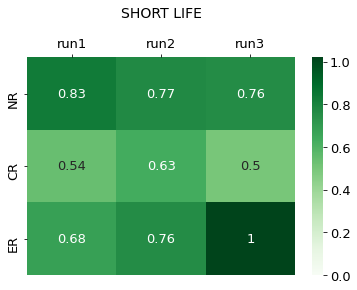

In [73]:
set_layout()
cmap='Greens'
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(evol_array, cmap=cmap, annot=True, xticklabels=runs, yticklabels=proteins, vmin=0, vmax=1.02)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
ax.set_title('{}'.format(life.upper()), pad=20);

save_figures(fig,path=path_figures, name_file= 'evolscores_{}'.format(life))